# Feature selection

## Table Of Contents
* [Question 2: Feature selection](#chapter_1)
    * [Section 1.1: Importing the required libraries](#section_1_1)
    * [Section 1.2: Loading the input data csv file and importing it into dataframe](#section_1_2)
    * [Section 1.3: Exploratory Data Analysis (EDA)](#section_1_3)
        * [Section 1.3.1: Displaying the top 5 rows](#section_1_3_1)
        * [Section 1.3.2: Concatenating two dataframes along column](#section_1_3_2)
        * [Section 1.3.3: Returning True if all columns are numeric, False otherwise](#section_1_3_3)
        * [Section 1.3.4: Displaying the summary of data](#section_1_3_4)
        * [Section 1.3.5: Finding the total number of rows and columns](#section_1_3_5)
        * [Section 1.3.6: Finding the duplicate rows](#section_1_3_6)
        * [Section 1.3.7: Finding the duplicate columns](#section_1_3_7)
        * [Section 1.3.8: Finding the missing values](#section_1_3_8)
        * [Section 1.3.9: Finding the constant columns](#section_1_3_9)
        * [Section 1.3.10: Dropping the constant columns](#section_1_3_10)
    * [Section 1.4: Feature selection by Lasso regression using (A) only the features in $𝐗_{1}$](#section_1_4)
        * [Section 1.4.1: Using only the features in $𝐗_{1}$](#section_1_4_1)
        * [Section 1.4.2: Bootstrapping](#section_1_4_2) 
        * [Section 1.4.3: Splitting the dataset into training and test sets](#section_1_4_3)
        * [Section 1.4.4: Building a pipeline by a StandardScaler and the Lasso model](#section_1_4_4)
        * [Section 1.4.5: Optimizing the hyperparameter $\alpha$ of Lasso regression](#section_1_4_5)
        * [Section 1.4.6: Fitting the grid search to the training set ](#section_1_4_6)
        * [Section 1.4.7: Finding the best value of the hyperparameter $\alpha$](#section_1_4_7)
        * [Section 1.4.8: Finding the coefficients of Lasso regression](#section_1_4_8)
        * [Section 1.4.9: Selecting the important features by Lasso regression](#section_1_4_9)
    * [Section 1.5: Feature selection by Lasso regression using (B) both sets of features in $𝐗_{1}$ and $𝐗_{2}$ together](#section_1_5)
        * [Section 1.5.1: Using only the features in $𝐗_{1}$](#section_1_5_1)
        * [Section 1.5.2: Bootstrapping](#section_1_5_2) 
        * [Section 1.5.3: Splitting the dataset into training and test sets](#section_1_5_3)
        * [Section 1.5.4: Building a pipeline by a StandardScaler and the Lasso model](#section_1_5_4)
        * [Section 1.5.5: Optimizing the hyperparameter $\alpha$ of Lasso regression](#section_1_5_5)
        * [Section 1.5.6: Fitting the grid search to the training set ](#section_1_5_6)
        * [Section 1.5.7: Finding the best value of the hyperparameter $\alpha$](#section_1_5_7)
        * [Section 1.5.8: Finding the coefficients of Lasso regression](#section_1_5_8)
        * [Section 1.5.9: Selecting the important features by Lasso regression](#section_1_5_9)
    * [Section 1.6: Discussion](#section_1_6)

### Question 2: Feature selection <a class="anchor" id="chapter_1"></a>

##### Section 1.1: Importing the required libraries <a class="anchor" id="section_1_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

##### Section 1.2: Loading the input data csv file and importing it into dataframe <a class="anchor" id="section_1_2"></a>

In [2]:
y = pd.read_csv("C:\\Users\\Acer\\Desktop\\Big Data 2021\\Q2_y.csv")
X1 = pd.read_csv("C:\\Users\\Acer\\Desktop\\Big Data 2021\\Q2_X1.csv")
X2 = pd.read_csv("C:\\Users\\Acer\\Desktop\\Big Data 2021\\Q2_X2.csv")

An exploratory data analysis is performed with data in order to understand the dataset by summarizing their main characteristics, either statistically or visually.

##### Section 1.3: Exploratory Data Analysis (EDA) <a class="anchor" id="section_1_3"></a>

##### Section 1.3.1: Displaying the top 5 rows <a class="anchor" id="section_1_3_1"></a>

In [36]:
print(y.head())
print(X1.head())
print(X2.head())

        y
0  405.35
1  284.99
2  398.50
3  364.22
4  337.83
           D1         D2          D3          D4         D5         D6  \
0 -163.657814 -15.842025 -138.427774  270.609830 -24.946547 -28.139841   
1  123.125985 -15.842025 -138.427774  270.609830 -24.946547 -28.139841   
2  -91.961864 -15.842025 -138.427774  137.845853 -24.946547 -28.139841   
3  -86.446791 -15.842025 -138.427774  270.609830 -24.946547 -28.139841   
4  145.186277 -15.842025 -138.427774  137.845853 -24.946547 -28.139841   

           D7         D8         D9         D10     ...            D151  \
0  206.603142  -9.559832   2.389667  -42.502303     ...      133.806668   
1 -387.194987  36.905396  -3.486102  697.746147     ...      -50.305322   
2  294.493840  52.393805  -9.361872  -42.502303     ...      127.792959   
3 -479.373036 -40.536650   0.431077  -42.502303     ...     -107.435550   
4  258.051356 -40.536650 -11.320462  -42.502303     ...     -105.816475   

        D152      D153       D154       D155

##### Section 1.3.2: Concatenating two dataframes along column <a class="anchor" id="section_1_3_2"></a>

In [4]:
X1_X2 = pd.concat([X1, X2], axis=1)
print(X1_X2)

             D1          D2           D3           D4          D5          D6  \
0   -163.657814  -15.842025  -138.427774   270.609830  -24.946547  -28.139841   
1    123.125985  -15.842025  -138.427774   270.609830  -24.946547  -28.139841   
2    -91.961864  -15.842025  -138.427774   137.845853  -24.946547  -28.139841   
3    -86.446791  -15.842025  -138.427774   270.609830  -24.946547  -28.139841   
4    145.186277  -15.842025  -138.427774   137.845853  -24.946547  -28.139841   
5   -163.657814  -15.842025  -138.427774  -525.974036  -24.946547  -28.139841   
6   -202.263325  -15.842025  -138.427774     5.081875  -24.946547  -28.139841   
7    277.548031  -15.842025  -138.427774   137.845853  -24.946547  -28.139841   
8   -158.142741  -15.842025  -138.427774   270.609830  -24.946547  -28.139841   
9   -229.838691  -15.842025  -138.427774   137.845853  -24.946547  -28.139841   
10    45.914962  -15.842025  -138.427774   270.609830  -24.946547  461.962395   
11   156.216424  -15.842025 

##### Section 1.3.3: Returning True if all columns are numeric, False otherwise <a class="anchor" id="section_1_3_3"></a>

In [5]:
print(y.shape[1] == y.select_dtypes(include=np.number).shape[1])
print(X1.shape[1] == X1.select_dtypes(include=np.number).shape[1])
print(X1_X2.shape[1] == X1_X2.select_dtypes(include=np.number).shape[1])

True
True
True


The above result shows that all columns are numeric.

##### Section 1.3.4: Displaying the summary of data <a class="anchor" id="section_1_3_4"></a>

Checking the properties of the numeric features.

In [6]:
print(X1.describe())
print(X1_X2.describe())

                 D1            D2            D3            D4            D5  \
count  2.090000e+02  2.090000e+02  2.090000e+02  2.090000e+02  2.090000e+02   
mean   1.177665e-13  7.836368e-15 -6.282694e-14  5.049273e-13  1.489080e-14   
std    1.886390e+02  9.709947e+01  4.281952e+02  3.623861e+02  9.987028e+01   
min   -3.291100e+02 -1.584203e+01 -1.384278e+02 -1.057030e+03 -2.494655e+01   
25%   -1.250523e+02 -1.584203e+01 -1.384278e+02  5.081875e+00 -2.494655e+01   
50%   -4.232621e+01 -1.584203e+01 -1.384278e+02  1.378459e+02 -2.494655e+01   
75%    6.246018e+01 -1.584203e+01 -1.384278e+02  2.706098e+02 -2.494655e+01   
max    1.159960e+03  9.301532e+02  2.272523e+03  4.033738e+02  5.238775e+02   

                 D6            D7            D8            D9           D10  \
count  2.090000e+02  2.090000e+02  2.090000e+02  2.090000e+02  2.090000e+02   
mean  -2.485200e-14 -8.422821e-15 -1.002919e-14 -7.150049e-16  3.202542e-14   
std    1.239825e+02  2.745373e+02  1.976826e+02  1.

##### Section 1.3.5: Finding the total number of rows and columns <a class="anchor" id="section_1_3_5"></a>

In [7]:
print(y.shape)
print(X1.shape)
print(X1_X2.shape)

(209, 1)
(209, 160)
(209, 260)


The above result shows that the dataset X = (X1,X2) is high dimensional that is, number of columns/features greater than number of rows/observations.

##### Section 1.3.6: Finding the duplicate rows <a class="anchor" id="section_1_3_6"></a>

In [8]:
print(X1.duplicated().sum())
print(X1_X2.duplicated().sum())

0
0


The above result shows that there is no duplicate row in X1 and X = (X1,X2).

##### Section 1.3.7: Finding the duplicate columns <a class="anchor" id="section_1_3_7"></a>

In [9]:
print(X1.columns.duplicated().sum())
print(X1_X2.columns.duplicated().sum())

0
0


The above result shows that there is no duplicate column in X1 and X = (X1,X2).

##### Section 1.3.8: Finding the missing values <a class="anchor" id="section_1_3_8"></a>

In [10]:
print(y.isnull().sum().sum())
print(X1.isnull().sum().sum())
print(X1_X2.isnull().sum().sum())

0
0
0


The above result shows that there is no missing value in y, X1 and X = (X1,X2).

##### Section 1.3.9: Finding the constant columns <a class="anchor" id="section_1_3_9"></a>

In [11]:
print(X1.columns[X1.nunique() <= 1])
print(X1_X2.columns[X1_X2.nunique() <= 1])

Index([], dtype='object')
Index([], dtype='object')


The above result shows that there is no constant column in X1 and X = (X1,X2).

##### Section 1.3.10: Finding the feature names <a class="anchor" id="section_1_3_10"></a>

In [12]:
features = list(X1.columns)
print(features)
features2 = list(X1_X2.columns)
print(features2)

['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41', 'D42', 'D43', 'D44', 'D45', 'D46', 'D47', 'D48', 'D49', 'D50', 'D51', 'D52', 'D53', 'D54', 'D55', 'D56', 'D57', 'D58', 'D59', 'D60', 'D61', 'D62', 'D63', 'D64', 'D65', 'D66', 'D67', 'D68', 'D69', 'D70', 'D71', 'D72', 'D73', 'D74', 'D75', 'D76', 'D77', 'D78', 'D79', 'D80', 'D81', 'D82', 'D83', 'D84', 'D85', 'D86', 'D87', 'D88', 'D89', 'D90', 'D91', 'D92', 'D93', 'D94', 'D95', 'D96', 'D97', 'D98', 'D99', 'D100', 'D101', 'D102', 'D103', 'D104', 'D105', 'D106', 'D107', 'D108', 'D109', 'D110', 'D111', 'D112', 'D113', 'D114', 'D115', 'D116', 'D117', 'D118', 'D119', 'D120', 'D121', 'D122', 'D123', 'D124', 'D125', 'D126', 'D127', 'D128', 'D129', 'D130', 'D131', 'D132', 'D133', 'D134', 'D135', 'D136', 'D137', 'D138', 'D1

##### Section 1.4: Feature selection by Lasso regression  using (A) only the features in $𝐗_{1}$ <a class="anchor" id="section_1_4"></a>

##### Section 1.4.1: Using only the features in $𝐗_{1}$ <a class="anchor" id="section_1_4_1"></a>

In [13]:
A = X1
b = y

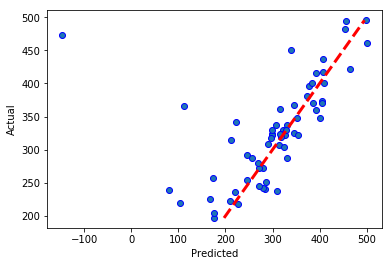

The model performance for testing set
--------------------------------------
MAE is 45.166395688146245
MSE is 9122.171024846733
R2 score is -0.6182391883269587


In [14]:
X_train_prev, X_test_prev, y_train_prev, y_test_prev = train_test_split(X1,y,test_size=0.3, random_state=0)
model_prev = LinearRegression()
model_prev.fit(X_train_prev, y_train_prev)
y_predicted_prev = model_prev.predict(X_test_prev)

fig, ax = plt.subplots()
ax.scatter(y_predicted_prev, y_test_prev, edgecolors=(0, 0, 1))
ax.plot([y_test_prev.min(), y_test_prev.max()], [y_test_prev.min(), y_test_prev.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\ActualvsPredicted_A_prev.png')
plt.show()

mae_prev = metrics.mean_absolute_error(y_test_prev, y_predicted_prev)
mse_prev = metrics.mean_squared_error(y_test_prev, y_predicted_prev)
r2_prev = metrics.r2_score(y_test_prev, y_predicted_prev)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_prev))
print('MSE is {}'.format(mse_prev))
print('R2 score is {}'.format(r2_prev))

##### Section 1.4.2: Bootstrapping <a class="anchor" id="section_1_4_2"></a>

In [15]:
boot_index_replications = np.array([np.random.choice(len(A),int(np.ceil(0.8*len(A))),replace = True)for _ in range(1000)])
boot_index = np.mean(boot_index_replications, axis=1)

##### Section 1.4.3: Splitting the dataset into training and test sets <a class="anchor" id="section_1_4_3"></a>

The dataset is split into training and test sets. But all the calculations are performed on the training set only. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(A.iloc[boot_index], b.iloc[boot_index], test_size=0.30)

##### Section 1.4.4: Building a pipeline by data standardization and Lasso model <a class="anchor" id="section_1_4_4"></a>

The pipeline is made by the StandardScaler and the Lasso object.

Data standardization of a feature means to scale the observations of the feature with mean 0 and standard deviation 1 given by the formula $$Z = \frac{X - mean(X)}{sd(X)}$$.

In [17]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
                    ])

##### Section 1.4.5: Optimizing the hyperparameter  $\alpha$ of Lasso regression <a class="anchor" id="section_1_4_5"></a>

The hyperparameter $\alpha$ of Lasso regression is optimized using the GridSearchCV object in the following way. 

1. Several $\alpha$ values are tested from 0.1 to 10 with step 0.1. 

2. For each $\alpha$ value, the average value of the mean squared error is calculated in a 5-folds cross-validation.

3. Select the value of $\alpha$ that minimizes such performance metrics. 

In [18]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

##### Section 1.4.6: Fitting the grid search to the training set <a class="anchor" id="section_1_4_6"></a>

In [19]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ...... model__alpha=0.1, score=-0.9384593196474784, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ...... model__alpha=0.1, score=-2.2644768267875954, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ...... model__alpha=0.1, score=-0.5041345670732958, total=   0.0s
[CV] model__alpha=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... model__alpha=0.1, score=-0.23182550362226542, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ..... model__alpha=0.1, score=-0.42888606109812477, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ...... model__alpha=0.2, score=-1.1964155652185298, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ...... model__alpha=0.2, score=-2.0750408605792505, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ....... model__alpha=0.2, score=-1.105490929496506, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ...... model__alpha=0.2, score=-0.6504607377194958, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ....... model__alpha=0.2, score=-1.004607355659017, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  

[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-21.003847619142967, total=   0.0s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-15.151466636378116, total=   0.0s
[CV] model__alpha=1.4000000000000001 .................................
[CV]  model__alpha=1.4000000000000001, score=-15.609671814503304, total=   0.0s
[CV] model__alpha=1.4000000000000001 .................................
[CV]  model__alpha=1.4000000000000001, score=-18.61327631901237, total=   0.0s
[CV] model__alpha=1.4000000000000001 .................................
[CV]  model__alpha=1.4000000000000001, score=-26.909651806916735, total=   0.0s
[CV] model__alpha=1.4000000000000001 .................................
[CV]  model__alpha=1.4000000000000001, score=-24.13448702807794, total=   0.0s
[CV] model__alpha=1.4000000000000001 .................................
[CV]  model__alpha=1.4000

[CV] model__alpha=2.6 ................................................
[CV] ...... model__alpha=2.6, score=-51.659885536968716, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ....... model__alpha=2.6, score=-59.97832019004912, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ...... model__alpha=2.6, score=-56.325928004437905, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ....... model__alpha=2.6, score=-42.72717884489488, total=   0.0s
[CV] model__alpha=2.7 ................................................
[CV] ....... model__alpha=2.7, score=-39.74970160485282, total=   0.0s
[CV] model__alpha=2.7 ................................................
[CV] ....... model__alpha=2.7, score=-54.36971530597515, total=   0.0s
[CV] model__alpha=2.7 ................................................
[CV] ...... model__alpha=2.7, score=-62.627963664749664, total=   0.0s
[CV] m

[CV] model__alpha=3.8000000000000003 .................................
[CV]  model__alpha=3.8000000000000003, score=-69.22679880576646, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-68.4239242992828, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-87.27135605892158, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-91.92243541460869, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-99.57009444549665, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-71.85784438725724, total=   0.0s
[CV] model__alpha=4.0 ................................................
[CV] ....... model__alpha=4.0,

[CV] model__alpha=5.1 ................................................
[CV] ...... model__alpha=5.1, score=-125.15847099196523, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ...... model__alpha=5.1, score=-142.89949445201248, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ...... model__alpha=5.1, score=-106.95696326862351, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] ...... model__alpha=5.2, score=-110.28857803599513, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] ...... model__alpha=5.2, score=-125.17120184642346, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] ...... model__alpha=5.2, score=-128.27163028604517, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] ....... model__alpha=5.2, score=-146.8804111231234, total=   0.0s
[CV] m

[CV] model__alpha=6.3 ................................................
[CV] ....... model__alpha=6.3, score=-158.5673256374379, total=   0.0s
[CV] model__alpha=6.3 ................................................
[CV] ...... model__alpha=6.3, score=-162.24382363653058, total=   0.0s
[CV] model__alpha=6.3 ................................................
[CV] ...... model__alpha=6.3, score=-192.25191340921242, total=   0.0s
[CV] model__alpha=6.3 ................................................
[CV] ....... model__alpha=6.3, score=-147.7136964934096, total=   0.0s
[CV] model__alpha=6.4 ................................................
[CV] ....... model__alpha=6.4, score=-149.3072826856495, total=   0.0s
[CV] model__alpha=6.4 ................................................
[CV] ....... model__alpha=6.4, score=-161.8653572888365, total=   0.0s
[CV] model__alpha=6.4 ................................................
[CV] ...... model__alpha=6.4, score=-165.30355726660605, total=   0.0s
[CV] m

[CV] ....... model__alpha=7.5, score=-242.3965507080337, total=   0.0s
[CV] model__alpha=7.5 ................................................
[CV] ...... model__alpha=7.5, score=-194.29997785836085, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] ...... model__alpha=7.6, score=-194.51112228235917, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] ...... model__alpha=7.6, score=-199.48166788458207, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] ...... model__alpha=7.6, score=-202.25336311727443, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] ...... model__alpha=7.6, score=-246.17608406158647, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] ...... model__alpha=7.6, score=-198.51548463887477, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] .

[CV] ...... model__alpha=8.9, score=-237.49412168282848, total=   0.0s
[CV] model__alpha=8.9 ................................................
[CV] ...... model__alpha=8.9, score=-241.37754765065688, total=   0.0s
[CV] model__alpha=8.9 ................................................
[CV] ....... model__alpha=8.9, score=-289.3170987413238, total=   0.0s
[CV] model__alpha=8.9 ................................................
[CV] ...... model__alpha=8.9, score=-246.02055392907496, total=   0.0s
[CV] model__alpha=9.0 ................................................
[CV] ...... model__alpha=9.0, score=-242.98140970762938, total=   0.0s
[CV] model__alpha=9.0 ................................................
[CV] ...... model__alpha=9.0, score=-240.67858205795565, total=   0.0s
[CV] model__alpha=9.0 ................................................
[CV] ...... model__alpha=9.0, score=-244.24414982794875, total=   0.0s
[CV] model__alpha=9.0 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:   10.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'model__alpha': array([0.1, 0.2, ..., 9.8, 9.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

##### Section 1.4.7: Finding the best value of the hyperparameter $\alpha$ <a class="anchor" id="section_1_4_7"></a>

In [20]:
search.best_params_

{'model__alpha': 0.1}

##### Section 1.4.8: Finding the coefficients of Lasso regression <a class="anchor" id="section_1_4_8"></a>

In [21]:
coefficients = search.best_estimator_.named_steps['model'].coef_
print(coefficients)

[ 0.         -0.          0.          0.02386234  0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.         -0.          0.         -0.
 15.37083842  0.          0.          0.         -0.          0.
  0.         -0.         -8.60806463  1.82772233  2.10254382  0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.35039378 -0.
  0.          0.          3.3185096  -0.         -0.          0.
  0.         -0.          0.          0.         -0.          9.22099344
  0.         -0.         -0.         -0.          0.         -0.
 -0.26585865 -0.          7.49366589  0.          0.         -0.
 -0.          0.          0.         -0.          0.          3.13615327
 -0.         -0.12466153  0.          0.          0.          0.
 -0.          0.         -0.         -0.          3.54979097  4.81851561
 

##### Section 1.4.9: Selecting the important features by Lasso regression <a class="anchor" id="section_1_4_9"></a>

The importance of a feature is the absolute value of its coefficient.

In [22]:
importance = np.abs(coefficients)
print(len(np.array(features)[importance > 0]))
print(np.array(features)[importance > 0])
print(len(np.array(features)[importance == 0]))
print(np.array(features)[importance == 0])

25
['D4' 'D25' 'D33' 'D34' 'D35' 'D47' 'D51' 'D60' 'D67' 'D69' 'D78' 'D80'
 'D89' 'D90' 'D93' 'D96' 'D99' 'D100' 'D104' 'D105' 'D128' 'D129' 'D140'
 'D146' 'D157']
135
['D1' 'D2' 'D3' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13' 'D14'
 'D15' 'D16' 'D17' 'D18' 'D19' 'D20' 'D21' 'D22' 'D23' 'D24' 'D26' 'D27'
 'D28' 'D29' 'D30' 'D31' 'D32' 'D36' 'D37' 'D38' 'D39' 'D40' 'D41' 'D42'
 'D43' 'D44' 'D45' 'D46' 'D48' 'D49' 'D50' 'D52' 'D53' 'D54' 'D55' 'D56'
 'D57' 'D58' 'D59' 'D61' 'D62' 'D63' 'D64' 'D65' 'D66' 'D68' 'D70' 'D71'
 'D72' 'D73' 'D74' 'D75' 'D76' 'D77' 'D79' 'D81' 'D82' 'D83' 'D84' 'D85'
 'D86' 'D87' 'D88' 'D91' 'D92' 'D94' 'D95' 'D97' 'D98' 'D101' 'D102'
 'D103' 'D106' 'D107' 'D108' 'D109' 'D110' 'D111' 'D112' 'D113' 'D114'
 'D115' 'D116' 'D117' 'D118' 'D119' 'D120' 'D121' 'D122' 'D123' 'D124'
 'D125' 'D126' 'D127' 'D130' 'D131' 'D132' 'D133' 'D134' 'D135' 'D136'
 'D137' 'D138' 'D139' 'D141' 'D142' 'D143' 'D144' 'D145' 'D147' 'D148'
 'D149' 'D150' 'D151' 'D152' 'D153' 'D154' 

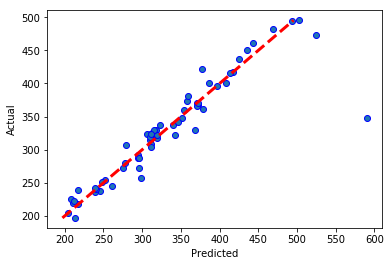

The model performance for testing set
--------------------------------------
MAE is 14.713126574006173
MSE is 1165.9852247780884
R2 score is 0.7931585607629164


In [23]:
X1_new = X1[list(np.array(features)[importance > 0])]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X1_new,y,test_size=0.3, random_state=0)
model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)
y_predicted_new = model_new.predict(X_test_new)

fig, ax = plt.subplots()
ax.scatter(y_predicted_new, y_test_new, edgecolors=(0, 0, 1))
ax.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\ActualvsPredicted_A_new.png')

plt.show()

mae_new = metrics.mean_absolute_error(y_test_new, y_predicted_new)
mse_new = metrics.mean_squared_error(y_test_new, y_predicted_new)
r2_new = metrics.r2_score(y_test_new, y_predicted_new)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_new))
print('MSE is {}'.format(mse_new))
print('R2 score is {}'.format(r2_new))

##### Section 1.5: Feature selection by Lasso regression using (B) both sets of features in $𝐗_{1}$ and $𝐗_{2}$ together <a class="anchor" id="section_1_5"></a>

##### Section 1.5.1: Using both sets of features in $𝐗_{1}$ and $𝐗_{2}$ together <a class="anchor" id="section_1_5_1"></a>

In [24]:
A2 = X1_X2
b = y

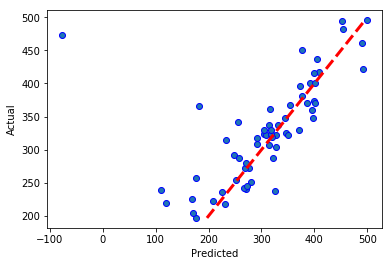

The model performance for testing set
--------------------------------------
MAE is 40.12546802023345
MSE is 6864.944570191302
R2 score is -0.2178156163611924


In [25]:
X_train2_prev, X_test2_prev, y_train2_prev, y_test2_prev = train_test_split(X1_X2,y,test_size=0.3, random_state=0)
model2_prev = LinearRegression()
model2_prev.fit(X_train2_prev, y_train2_prev)
y_predicted2_prev = model2_prev.predict(X_test2_prev)

fig, ax = plt.subplots()
ax.scatter(y_predicted2_prev, y_test2_prev, edgecolors=(0, 0, 1))
ax.plot([y_test2_prev.min(), y_test2_prev.max()], [y_test2_prev.min(), y_test2_prev.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\ActualvsPredicted_B_prev.png')
plt.show()

mae2_prev = metrics.mean_absolute_error(y_test2_prev, y_predicted2_prev)
mse2_prev = metrics.mean_squared_error(y_test2_prev, y_predicted2_prev)
r22_prev = metrics.r2_score(y_test2_prev, y_predicted2_prev)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae2_prev))
print('MSE is {}'.format(mse2_prev))
print('R2 score is {}'.format(r22_prev))

##### Section 1.5.2: Bootstrapping <a class="anchor" id="section_1_5_2"></a>

In [26]:
boot_index_replications2 = np.array([np.random.choice(len(A2),int(np.ceil(0.8*len(A2))),replace = True)for _ in range(1000)])
boot_index2 = np.mean(boot_index_replications2, axis=1)

##### Section 1.5.3: Splitting the dataset into training and test sets <a class="anchor" id="section_1_5_3"></a>

In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(A2.iloc[boot_index2], b.iloc[boot_index2], test_size=0.30)

##### Section 1.5.4: Building a pipeline by data standardization and Lasso model <a class="anchor" id="section_1_5_4"></a>

In [28]:
pipeline2 = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

##### Section 1.5.5: Optimizing the hyperparameter  $\alpha$ of Lasso regression <a class="anchor" id="section_1_5_5"></a>

In [29]:
search2 = GridSearchCV(pipeline2,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

##### Section 1.5.6: Fitting the grid search to the training set <a class="anchor" id="section_1_5_6"></a>

In [30]:
search2.fit(X_train2,y_train2)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ..... model__alpha=0.1, score=-0.45822003984005305, total=   0.0s
[CV] model__alpha=0.1 ................................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ..... model__alpha=0.1, score=-0.39514447476542297, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ..... model__alpha=0.1, score=-0.07020181426705757, total=   0.0s
[CV] model__alpha=0.1 ................................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ....... model__alpha=0.1, score=-1.167403920150556, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ..... model__alpha=0.1, score=-0.47318408077381174, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ...... model__alpha=0.2, score=-1.7559488817898672, total=   0.0s
[CV] model__alpha=0.2 ................................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ...... model__alpha=0.2, score=-0.4681696079279829, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..... model__alpha=0.2, score=-0.31675067024498305, total=   0.0s
[CV] model__alpha=0.2 ................................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ...... model__alpha=0.2, score=-2.6845027444398184, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ...... model__alpha=0.2, score=-0.8521487317949538, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  model__alpha=0.30000000000000004, score=-3.3622615684442643, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-1.5246989858048563, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  model__alpha=0.30000000000000004, score=-0.7526851176777332, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-5.105344146174768, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-2.609887552086607, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ....... model__alpha=0.4, score=-5.298218695802325, total=   0.0s
[CV] model__alpha=0.4 ................................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ...... model__alpha=0.4, score=-2.4753274356100436, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ...... model__alpha=0.4, score=-1.4895599182748587, total=   0.0s
[CV] model__alpha=0.4 ................................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ....... model__alpha=0.4, score=-7.747514964387678, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ...... model__alpha=0.4, score=-6.1125031216917165, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ....... model__alpha=0.5, score=-7.420490115578808, total=   0.0s
[CV] model__alpha=0.5 ................................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ....... model__alpha=0.5, score=-2.809308009755196, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ....... model__alpha=0.5, score=-2.335162542970169, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ....... model__alpha=0.5, score=-8.407494739702104, total=   0.0s
[CV] model__alpha=0.5 ................................................

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



[CV] ....... model__alpha=0.5, score=-7.047234231713639, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ....... model__alpha=0.6, score=-9.274496997711324, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ....... model__alpha=0.6, score=-3.298695778581981, total=   0.0s
[CV] model__alpha=0.6 ................................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ...... model__alpha=0.6, score=-3.3983546111684015, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ....... model__alpha=0.6, score=-9.678148215460944, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ....... model__alpha=0.6, score=-8.578600089815827, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-11.231866066906216, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-4.014441024937453, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-4.716991017765277, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  model__alpha=0.7000000000000001, score=-11.348002619589712, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-10.511930523540864, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ...... model__alpha=0.8, score=-12.969831752339317, total=   0.0s
[CV] model__alpha=0.8 ................................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ....... model__alpha=0.8, score=-4.886240092646985, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ....... model__alpha=0.8, score=-6.153384703685734, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ...... model__alpha=0.8, score=-12.769234731670746, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ...... model__alpha=0.8, score=-12.823664117310523, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ...... model__alpha=0.9, score=-14.270617404661992, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ....... model__alpha=0.9, score=-5.865933621146886, total=   0.0s
[CV] model__alpha=0.9 ................................................


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ........ model__alpha=0.9, score=-7.62168501226052, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ...... model__alpha=0.9, score=-14.322486053018213, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ...... model__alpha=0.9, score=-14.920285581639119, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] ...... model__alpha=1.0, score=-15.588145351130915, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] ....... model__alpha=1.0, score=-7.211515185877307, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] ....... model__alpha=1.0, score=-9.306623045896266, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] ...... model__alpha=1.0, score=-15.374738120746263, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] .

[CV] model__alpha=2.1 ................................................
[CV] ...... model__alpha=2.1, score=-35.187830455667765, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] ....... model__alpha=2.1, score=-24.37088598300272, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] ....... model__alpha=2.1, score=-29.85364740538014, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] ....... model__alpha=2.1, score=-31.96349262009386, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] ....... model__alpha=2.1, score=-38.79823986463252, total=   0.0s
[CV] model__alpha=2.2 ................................................
[CV] ...... model__alpha=2.2, score=-37.489870297420815, total=   0.0s
[CV] model__alpha=2.2 ................................................
[CV] ...... model__alpha=2.2, score=-26.422858850307946, total=   0.0s
[CV] m

[CV]  model__alpha=3.3000000000000003, score=-58.29340005452588, total=   0.0s
[CV] model__alpha=3.3000000000000003 .................................
[CV]  model__alpha=3.3000000000000003, score=-47.53964530524376, total=   0.0s
[CV] model__alpha=3.3000000000000003 .................................
[CV]  model__alpha=3.3000000000000003, score=-57.92371308278381, total=   0.0s
[CV] model__alpha=3.3000000000000003 .................................
[CV]  model__alpha=3.3000000000000003, score=-54.928650713567016, total=   0.0s
[CV] model__alpha=3.3000000000000003 .................................
[CV]  model__alpha=3.3000000000000003, score=-55.032695700459826, total=   0.0s
[CV] model__alpha=3.4000000000000004 .................................
[CV]  model__alpha=3.4000000000000004, score=-60.253125978882935, total=   0.0s
[CV] model__alpha=3.4000000000000004 .................................
[CV]  model__alpha=3.4000000000000004, score=-49.484974874169346, total=   0.0s
[CV] model__alpha

[CV] ....... model__alpha=4.5, score=-93.45106023876505, total=   0.0s
[CV] model__alpha=4.5 ................................................
[CV] ....... model__alpha=4.5, score=-83.68725681356045, total=   0.0s
[CV] model__alpha=4.5 ................................................
[CV] ....... model__alpha=4.5, score=-84.00212639616947, total=   0.0s
[CV] model__alpha=4.6 ................................................
[CV] ....... model__alpha=4.6, score=-88.39173851026376, total=   0.0s
[CV] model__alpha=4.6 ................................................
[CV] ....... model__alpha=4.6, score=-77.42048750881129, total=   0.0s
[CV] model__alpha=4.6 ................................................
[CV] ....... model__alpha=4.6, score=-96.87434097622479, total=   0.0s
[CV] model__alpha=4.6 ................................................
[CV] ....... model__alpha=4.6, score=-86.32208811793322, total=   0.0s
[CV] model__alpha=4.6 ................................................
[CV] .

[CV] ...... model__alpha=5.7, score=-119.15797907026307, total=   0.0s
[CV] model__alpha=5.7 ................................................
[CV] ...... model__alpha=5.7, score=-120.42225457762514, total=   0.0s
[CV] model__alpha=5.8 ................................................
[CV] ...... model__alpha=5.8, score=-126.69764662409966, total=   0.0s
[CV] model__alpha=5.8 ................................................
[CV] ...... model__alpha=5.8, score=-112.39025239157682, total=   0.0s
[CV] model__alpha=5.8 ................................................
[CV] ...... model__alpha=5.8, score=-141.79259229931586, total=   0.0s
[CV] model__alpha=5.8 ................................................
[CV] ...... model__alpha=5.8, score=-122.12605747447861, total=   0.0s
[CV] model__alpha=5.8 ................................................
[CV] ...... model__alpha=5.8, score=-123.45290144417865, total=   0.0s
[CV] model__alpha=5.9 ................................................
[CV] .

[CV] model__alpha=7.0 ................................................
[CV] ...... model__alpha=7.0, score=-162.39314005909608, total=   0.0s
[CV] model__alpha=7.0 ................................................
[CV] ...... model__alpha=7.0, score=-149.76273166150116, total=   0.0s
[CV] model__alpha=7.0 ................................................
[CV] ...... model__alpha=7.0, score=-185.32344839891866, total=   0.0s
[CV] model__alpha=7.0 ................................................
[CV] ...... model__alpha=7.0, score=-159.31204867065347, total=   0.0s
[CV] model__alpha=7.0 ................................................
[CV] ...... model__alpha=7.0, score=-162.58696680502982, total=   0.0s
[CV] model__alpha=7.1 ................................................
[CV] ...... model__alpha=7.1, score=-165.25170286879592, total=   0.0s
[CV] model__alpha=7.1 ................................................
[CV] ...... model__alpha=7.1, score=-153.18597802027872, total=   0.0s
[CV] m

[CV] model__alpha=8.2 ................................................
[CV] ...... model__alpha=8.2, score=-191.36216128117553, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] ....... model__alpha=8.2, score=-229.1876424100736, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] ...... model__alpha=8.2, score=-194.89819232598498, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] ....... model__alpha=8.2, score=-191.5453107285507, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ...... model__alpha=8.3, score=-197.17741742421384, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ...... model__alpha=8.3, score=-194.57331004852338, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ...... model__alpha=8.3, score=-232.89724832625777, total=   0.0s
[CV] m

[CV] ...... model__alpha=9.4, score=-220.15458625595045, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] ....... model__alpha=9.5, score=-230.9298716548298, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] ...... model__alpha=9.5, score=-233.16931163248182, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] ...... model__alpha=9.5, score=-279.83589669536224, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] ...... model__alpha=9.5, score=-235.94377762501318, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] ....... model__alpha=9.5, score=-222.3714486114762, total=   0.0s
[CV] model__alpha=9.6 ................................................
[CV] ...... model__alpha=9.6, score=-233.94822453104317, total=   0.0s
[CV] model__alpha=9.6 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:   21.1s finished
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'model__alpha': array([0.1, 0.2, ..., 9.8, 9.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

##### Section 1.5.7: Finding the best value of the hyperparameter $\alpha$ <a class="anchor" id="section_1_5_7"></a>

In [31]:
search2.best_params_

{'model__alpha': 0.1}

##### Section 1.5.8: Finding the coefficients of Lasso regression <a class="anchor" id="section_1_5_8"></a>

In [32]:
coefficients2 = search2.best_estimator_.named_steps['model'].coef_

##### Section 1.5.9: Selecting the important features by Lasso regression <a class="anchor" id="section_1_5_9"></a>

In [33]:
importance2 = np.abs(coefficients2)
print(len(np.array(features2)[importance2 > 0]))
print(np.array(features2)[importance2 > 0])
print(len(np.array(features2)[importance2 == 0]))
print(np.array(features2)[importance2 == 0])

34
['D25' 'D33' 'D51' 'D60' 'D67' 'D68' 'D69' 'D78' 'D89' 'D90' 'D92' 'D96'
 'D99' 'D100' 'D105' 'D106' 'D121' 'D124' 'D128' 'D134' 'D140' 'D149'
 'D157' 'D159' 'D169' 'D170' 'D171' 'D182' 'D189' 'D196' 'D202' 'D203'
 'D214' 'D220']
226
['D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13'
 'D14' 'D15' 'D16' 'D17' 'D18' 'D19' 'D20' 'D21' 'D22' 'D23' 'D24' 'D26'
 'D27' 'D28' 'D29' 'D30' 'D31' 'D32' 'D34' 'D35' 'D36' 'D37' 'D38' 'D39'
 'D40' 'D41' 'D42' 'D43' 'D44' 'D45' 'D46' 'D47' 'D48' 'D49' 'D50' 'D52'
 'D53' 'D54' 'D55' 'D56' 'D57' 'D58' 'D59' 'D61' 'D62' 'D63' 'D64' 'D65'
 'D66' 'D70' 'D71' 'D72' 'D73' 'D74' 'D75' 'D76' 'D77' 'D79' 'D80' 'D81'
 'D82' 'D83' 'D84' 'D85' 'D86' 'D87' 'D88' 'D91' 'D93' 'D94' 'D95' 'D97'
 'D98' 'D101' 'D102' 'D103' 'D104' 'D107' 'D108' 'D109' 'D110' 'D111'
 'D112' 'D113' 'D114' 'D115' 'D116' 'D117' 'D118' 'D119' 'D120' 'D122'
 'D123' 'D125' 'D126' 'D127' 'D129' 'D130' 'D131' 'D132' 'D133' 'D135'
 'D136' 'D137' 'D138' 'D139' 'D141' 'D142' 

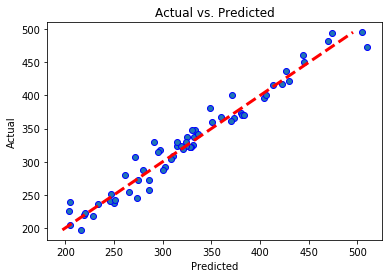

The model performance for testing set
--------------------------------------
MAE is 12.038008634239203
MSE is 237.69735368115323
R2 score is 0.9578333741342108


In [34]:
X1_X2_new = X1_X2[list(np.array(features2)[importance2 > 0])]

X_train2_new, X_test2_new, y_train2_new, y_test2_new = train_test_split(X1_X2_new,y,test_size=0.3, random_state=0)
model2_new = LinearRegression()
model2_new.fit(X_train2_new, y_train2_new)
y_predicted2_new = model2_new.predict(X_test2_new)

fig, ax = plt.subplots()
ax.scatter(y_predicted2_new, y_test2_new, edgecolors=(0, 0, 1))
ax.plot([y_test2_new.min(), y_test2_new.max()], [y_test2_new.min(), y_test2_new.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Actual vs. Predicted')
plt.savefig('C:\\Users\\Acer\\Desktop\\Big Data 2021\\ActualvsPredicted_B_new.png')
plt.show()

mae2_new = metrics.mean_absolute_error(y_test2_new, y_predicted2_new)
mse2_new = metrics.mean_squared_error(y_test2_new, y_predicted2_new)
r22_new = metrics.r2_score(y_test2_new, y_predicted2_new)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae2_new))
print('MSE is {}'.format(mse2_new))
print('R2 score is {}'.format(r22_new))

##### Section 1.6: Discussion <a class="anchor" id="section_1_6"></a>

1. From exploratory data analysis of the given datasets, t is found that $X$=($X_{1}$,$X_{2}$) is high dimensional dataset that is, number of features greater than number of observations.

2. Lasso regression is a popular feature selection technique for high dimensional dataset. Lasso uses a penalization method which reduces the chance of overestimating a regression coefficient.

3. Considering the computed regression metrics like the mean absolute error, the mean squared error, and the R-squared, it is concluded that the linear regression model is improved after feature selection in both the cases.
